In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import pickle
import random
import nibabel as nib
import time
import ants
import antspynet
import plotly.graph_objects as go

def plot_three_imgs(im1,im2,im3,name1,name2,name3):
    fig,ax = plt.subplots(1,3,figsize=(24,12))
    ax[0].imshow(im1)
    ax[0].set_title(name1,fontsize=24)
    ax[1].imshow(im2)
    ax[1].set_title(name2,fontsize=24)
    ax[2].imshow(im3)
    ax[2].set_title(name3,fontsize=24)

1. The first step is loading in the tabular data I have saved in this data I have saved all the .nii file locations and their corresponding target in a pickle file (compression file) in this location /home/jott2/brainlabs/ALL_DATA.pkl

In [ ]:
data=pd.read_pickle('/home/jott2/brainlabs/ALL_DATA.pkl')

2. Here I am defining the parcellation labels according the Deskar_atlas @USF Dr. Raj labratory

In [ ]:
Raj_deskar_Label_dict=dict({0:'background',
    6: 'left_cerebellem_exterior',
    10: 'left_thalamus_proper',
    11: 'left_caudate',
    12: 'left_putamen',
    13: 'left_pallidium',
    15: '4th_ventricle',
    17: 'left_hippocampus',
    18: 'left_amygdala',
    26: 'left_accumbens_area',
    28: 'left_ventral_DC',
    45: 'right_cerebellum_exterior',
    49: 'right_thalamus_proper',
    50: 'right_caudate',
    51: 'right_putamen',
    52: 'right_palladium',
    53: 'right_hippocampus',
    54: 'right_amygdala',
    58: 'right_accumbens_area',
    60: 'right_ventral_DC',
    1002: 'left_caudal_anterior_cingulate',
    1003: 'left_caudal_middle_frontal',
    1005: 'left_cuneus',
    1006: 'left_entorhinal',
    1007: 'left_fusiform',
    1008: 'left_inferior_parietal',
    1009: 'left_inferior_temporal',
    1010: 'left_isthmus_cingulate',
     1011: 'left_lateral_occipital',
     1012: 'left_lateral_orbitofrontal',
     1013: 'left_lingual',
     1014: 'left_medial_orbitofrontal',
     1015: 'left_middle_temporal',
     1016: 'left_parahippocampal',
     1017: 'left_paracentral',
     1018: 'left_pars_opercularis',
     1019: 'left_pars_orbitalis',
     1020: 'left_pars_triangularis',
     1021: 'left_pericalcarine',
     1022: 'left_postcentral',
     1023: 'left_posterior_cingulate',
     1024: 'left_precentral',
     1025: 'left_precuneus',
     1026: 'left_rostral_anterior_cingulate',
     1027: 'left_rostral_middle_frontal',
     1028: 'left_superior_frontal',
     1029: 'left_superior_parietal',
     1030: 'left_superior_temporal',
     1031: 'left_supramarginal',
     1034: 'left_transverse_temporal',
     1035: 'left_insula',
     2002: 'right_caudal_anterior_cingulate',
     2003: 'right_caudal_middle_frontal',
     2005: 'right_cuneus',
     2006: 'right_entorhinal',
     2007: 'right_fusiform',
     2008: 'right_inferior_parietal',
     2009: 'right_inferior_temporal',
     2010: 'right_isthmus_cingulate',
     2011: 'right_lateral_occipital',
     2012: 'right_lateral_orbitofrontal',
     2013: 'right_lingual',
     2014: 'right_medial_orbitofrontal',
     2015: 'right_middle temporal',
     2016: 'right_parahippocampal',
     2017: 'right_paracentral',
     2018: 'right_pars_opercularis',
     2019: 'right_pars_orbitalis',
     2020: 'right_pars_triangularis',
     2021: 'right_pericalcarine',
     2022: 'right_postcentral',
     2023: 'right_posterior_cingulate',
     2024: 'right_precentral',
     2025: 'right_precuneus',
     2026: 'right_rostral_anterior_cingulate',
     2027: 'right_rostral_middle_frontal',
     2028: 'right_superior_frontal',
     2029: 'right_superior_parietal',
     2030: 'right_superior_temporal',
     2031: 'right_supramarginal',
     2034: 'right_transverse_temporal',
     2035: 'right_insula'})

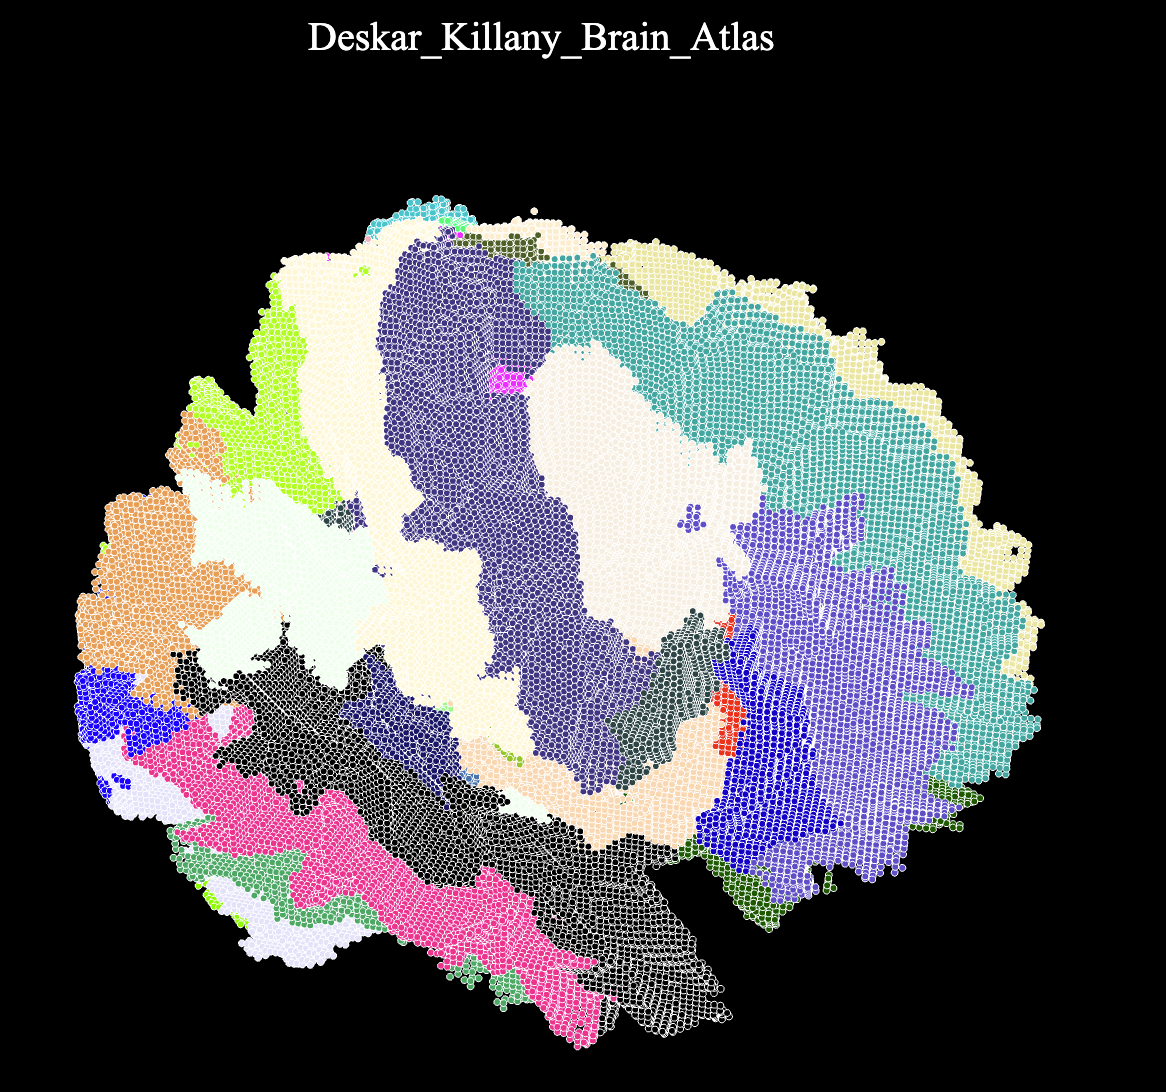

# Here is where the brain parcellation begins <br>
Steps: <br>
1. load in brain file
2. Parcellate brain file
3. apply grey matter segementation to initial Parcellation
4. Print/ Save Model


In [ ]:
#1
brain_num=20
img   = ants.image_read(data['input_file_path'][brain_num],3) #here is where I read in the file location from database 

In [ ]:
# 2 parcellation takes about 7 mins 
dkt=antspynet.desikan_killiany_tourville_labeling(img,do_preprocessing=True,verbose=False) #turn on verbose to see output
dkt_cortical_mask=ants.threshold_image(dkt,1,3000,1,0) # here is where we wil insert secondary code 
dkt1=dkt_cortical_mask * dkt #here is where I take out the extreanous data

In [ ]:
dkt_nump=dkt1.numpy()

In [ ]:
#3. In this case we are applying the target of the ANSI data set to the we have 3 ways of doing this..
img1   = ants.image_read(data['target_file_path'][brain_num],3)
img_mask_0=ants.threshold_image(img1,0,0,0,1)
img_mask_white=ants.threshold_image(img1,3,3,1,0)
img_mask_grey=ants.threshold_image(img1,2,2,1,0)#This only leaves classfied grey matter



In [ ]:
plot_three_imgs(img_mask_0.numpy()[:,:,100],img_mask_grey.numpy()[:,:,100],img_mask_white.numpy()[:,:,100],'Empty Mask','Grey Matter','White matter')

# as you can see from the plot above it need a propogation algorythm in order to fill the spaces
https://github.com/nipy/mindboggle/blob/master/mindboggle/thirdparty/ants.py

In [ ]:
#option 1 grey mask segementation using the empty space 
print('size of classification on .nii',(dkt1.numpy()>0).sum())
print('Size of mask from target',(img_mask_grey>0).sum())
final_image=img_mask_grey*dkt1
print('cross multiply',(final_image>0).sum())

# Note

In this area we are using the propagation on an dkt which is not only raj labels

In [ ]:
#option here is to remove all non_raj lab labels from initial dkt predictin
#keys=list(Raj_deskar_Label_dict.keys())
#for i in range(dkt_nump.shape[0]):
#    for j in range(dkt_nump.shape[1]):
#        for k in range(dkt_nump.shape[2]):
#            if(dkt_nump[i,j,k] not in keys):
#                dkt_nump[i,j,k]=0
            

In [ ]:
#option 2 Use built in ANTS propogation 
#https://mindboggle.readthedocs.io/en/latest/api/mindboggle.thirdparty.html
final_prop=ants.iMath(img_mask_grey,"PropagateLabelsThroughMask",img_mask_grey *dkt1)

In [ ]:
#GPU using
print('using propogation algorythm',(final_prop>0).sum())

In [ ]:
plot_three_imgs(final_image.numpy()[:,:,100],img_mask_grey.numpy()[:,:,100],final_prop.numpy()[:,:,100],'Simple Mult','Grey Matter','Propogation')

# Here is where I output tabular data 

In [ ]:
final_numpy=final_prop.numpy()
mask_numpy=img_mask_grey.numpy()

In [ ]:
#option here is to remove all non_raj lab labels from initial dkt predictin
keys=list(Raj_deskar_Label_dict.keys())
for i in range(final_numpy.shape[0]):
    for j in range(final_numpy.shape[1]):
        for k in range(final_numpy.shape[2]):
            if(final_numpy[i,j,k] not in keys):
                final_numpy[i,j,k]=0
            

In [ ]:
np.unique(final_numpy)

In [ ]:
shifted_prop=ants.from_numpy(final_numpy)
shifted_mask=ants.from_numpy(mask_numpy)

In [ ]:
tabular_data=ants.label_stats(shifted_mask,shifted_prop)

In [ ]:
tabular_data['LabelValue'].unique()

In [ ]:
Raj_deskar_Label_dict[1002]

In [ ]:
tabular_data['Names']= 0
for i in range(len(tabular_data)):
    num=tabular_data.loc[i]['LabelValue']
    name=Raj_deskar_Label_dict[int(num)]
    tabular_data['Names'].loc[i]=name

In [ ]:
tabular_datar_dataular_data

In [ ]:
# import plotly.express as px
# df = px.data.iris()
# fig = px.scatter_3d(tabular_data, x='x', y='y', z='z',
#               color='LabelValue',hover_name='Names')
# fig.show()

# Below is the graph Cell

In [ ]:
brain=final_image.numpy()

In [ ]:
# s='''
#         aliceblue, antiquewhite, aqua, aquamarine, azure,
#         beige, bisque, black, blanchedalmond, blue,
#         blueviolet, brown, burlywood, cadetblue,
#         chartreuse, chocolate, coral, cornflowerblue,
#         cornsilk, crimson, cyan, darkblue, darkcyan,
#         darkgoldenrod, darkgray, darkgrey, darkgreen,
#         darkkhaki, darkmagenta, darkolivegreen, darkorange,
#         darkorchid, darkred, darksalmon, darkseagreen,
#         darkslateblue, darkslategray, darkslategrey,
#         darkturquoise, darkviolet, deeppink, deepskyblue,
#         dimgray, dimgrey, dodgerblue, firebrick,
#         floralwhite, forestgreen, fuchsia, gainsboro,
#         ghostwhite, gold, goldenrod, gray, grey, green,
#         greenyellow, honeydew, hotpink, indianred, indigo,
#         ivory, khaki, lavender, lavenderblush, lawngreen,
#         lemonchiffon, lightblue, lightcoral, lightcyan,
#         lightgoldenrodyellow, lightgray, lightgrey,
#         lightgreen, lightpink, lightsalmon, lightseagreen,
#         lightskyblue, lightslategray, lightslategrey,
#         lightsteelblue, lightyellow, lime, limegreen,
#         linen, magenta, maroon, mediumaquamarine,
#         mediumblue, mediumorchid, mediumpurple,
#         mediumseagreen, mediumslateblue, mediumspringgreen,
#         mediumturquoise, mediumvioletred, midnightblue,
#         mintcream, mistyrose, moccasin, navajowhite, navy,
#         oldlace, olive, olivedrab, orange, orangered,
#         orchid, palegoldenrod, palegreen, paleturquoise,
#         palevioletred, papayawhip, peachpuff, peru, pink,
#         plum, powderblue, purple, red, rosybrown,
#         royalblue, saddlebrown, salmon, sandybrown,
#         seagreen, seashell, sienna, silver, skyblue,
#         slateblue, slategray, slategrey, snow, springgreen,
#         steelblue, tan, teal, thistle, tomato, turquoise,
#         violet, wheat, white, whitesmoke, yellow,
#         yellowgreen
#         '''
# li=s.split(',')
# li=[l.replace('\n','') for l in li]
# li=[l.replace(' ','') for l in li]


# random.seed=200
# color_list=random.sample(li,101)
# new_dict={}
# for i,k in enumerate(Raj_deskar_Label_dict.keys()):
#     new_dict[k]=color_list[i]
    

# x_list=[]
# y_list=[]
# z_list=[]
# color_labels=[]
# word_labels=[]
# for i in range(182):
#     for j in range(218):
#         for k in range(182):
#             if((brain[i,j,k] in Raj_deskar_Label_dict.keys()) & (brain[i,j,k]>0)):
#                 x_list.append(i)
#                 y_list.append(j)
#                 z_list.append(k)
#                 color_labels.append(new_dict[brain[i,j,k]])
#                 word_labels.append(Raj_deskar_Label_dict[brain[i,j,k]])
 


# df = pd.DataFrame(x_list, columns=['x'])
# df['y']=y_list
# df['z']=z_list
# df['color_label']=color_labels
# df['word_label']=word_labels
# parts=[]
# unique_list=df['word_label'].unique()
# for i in unique_list:
#     check=df[df['word_label']==i]
#     trace=go.Scatter3d(
#     x=check['x'],
#     y=check['y'],
#     z=check['z'],
#     text=i,
#     name=i,
#     mode='markers',
#     #showlegend=True,
#     marker=dict(
#         size=2,
#         line=dict(width=1,color='Black'),
#         color=check['color_label'],                # set color to an array/list of desired values
#         opacity=1 ))
#     parts.append(trace)
# annotations = list([
#     dict(text='Deskar_Killany_Brain_Atlas ', x=.5, y=.99, align='center', font=dict(family="Times New Roman",color="white",size=20),showarrow=False)
# ])    
# layout=go.Layout(showlegend=True,
#                   annotations=annotations,
#                   scene = dict(
#                     xaxis = dict(
#                          showbackground=False,
#                          visible=False,
#                         showgrid=False),
#                     yaxis = dict(
#                         visible=False,
#                         showbackground=False,
#                     showgrid=False),
#                     zaxis = dict(
#                         visible=False,
#                         showbackground=False,
#                         showgrid=False,),),
#                     margin=dict(l=0, r=0, b=0, t=0),
#                   legend=dict(
#         #x=1.1,
#         y=.98,
#         bordercolor='white',
#         borderwidth=2,
#     font=dict(size=10, color='white')
#                ),paper_bgcolor="black")
    
    
# fig = go.Figure(data=parts, layout=layout)
# #fig.write_html("Brainjustmask.html")
# fig.show()

In [ ]:
Deskar_Label_dict=dict({0:'background',
    4: 'left_lateral_ventricle',
    5: 'left_inferior_lateral_ventricle',
    6: 'left_cerebellem_exterior',
    7: 'left_cerebellum_white_matter',
    10: 'left_thalamus_proper',
    11: 'left_caudate',
    12: 'left_putamen',
    13: 'left_pallidium',
    15: '4th_ventricle',
    16: 'brain_stem',
    17: 'left_hippocampus',
    18: 'left_amygdala',
    24: 'CSF',
    25: 'left_lesion',
    26: 'left_accumbens_area',
    28: 'left_ventral_DC',
    30: 'left_vessel',
    43: 'right_lateral_ventricle',
    44: 'right_inferior_lateral_ventricle',
    45: 'right_cerebellum_exterior',
    46: 'right_cerebellum_white_matter',
    49: 'right_thalamus_proper',
    50: 'right_caudate',
    51: 'right_putamen',
    52: 'right_palladium',
    53: 'right_hippocampus',
    54: 'right_amygdala',
    57: 'right_lesion',
    58: 'right_accumbens_area',
    60: 'right_ventral_DC',
    62: 'right_vessel',
    72: '5th_ventricle',
    85: 'optic_chasm',
    91: 'left_basal_forebrain',
    92: 'right_basal_forebrain',
    630: 'cerebellar_vermal_lobules_I-V',
    631: 'cerebellar_vermal_lobules_VI-VII',
    632: 'cerebellar_vermal_lobules_VIII-X',
    1002: 'left_caudal_anterior_cingulate',
    1003: 'left_caudal_middle_frontal',
    1005: 'left_cuneus',
    1006: 'left_entorhinal',
    1007: 'left_fusiform',
    1008: 'left_inferior_parietal',
    1009: 'left_inferior_temporal',
    1010: 'left_isthmus_cingulate',
     1011: 'left_lateral_occipital',
     1012: 'left_lateral_orbitofrontal',
     1013: 'left_lingual',
     1014: 'left_medial_orbitofrontal',
     1015: 'left_middle_temporal',
     1016: 'left_parahippocampal',
     1017: 'left_paracentral',
     1018: 'left_pars_opercularis',
     1019: 'left_pars_orbitalis',
     1020: 'left_pars_triangularis',
     1021: 'left_pericalcarine',
     1022: 'left_postcentral',
     1023: 'left_posterior_cingulate',
     1024: 'left_precentral',
     1025: 'left_precuneus',
     1026: 'left_rostral_anterior_cingulate',
     1027: 'left_rostral_middle_frontal',
     1028: 'left_superior_frontal',
     1029: 'left_superior_parietal',
     1030: 'left_superior_temporal',
     1031: 'left_supramarginal',
     1034: 'left_transverse_temporal',
     1035: 'left_insula',
     2002: 'right_caudal_anterior_cingulate',
     2003: 'right_caudal_middle_frontal',
     2005: 'right_cuneus',
     2006: 'right_entorhinal',
     2007: 'right_fusiform',
     2008: 'right_inferior_parietal',
     2009: 'right_inferior_temporal',
     2010: 'right_isthmus_cingulate',
     2011: 'right_lateral_occipital',
     2012: 'right_lateral_orbitofrontal',
     2013: 'right_lingual',
     2014: 'right_medial_orbitofrontal',
     2015: 'right_middle temporal',
     2016: 'right_parahippocampal',
     2017: 'right_paracentral',
     2018: 'right_pars_opercularis',
     2019: 'right_pars_orbitalis',
     2020: 'right_pars_triangularis',
     2021: 'right_pericalcarine',
     2022: 'right_postcentral',
     2023: 'right_posterior_cingulate',
     2024: 'right_precentral',
     2025: 'right_precuneus',
     2026: 'right_rostral_anterior_cingulate',
     2027: 'right_rostral_middle_frontal',
     2028: 'right_superior_frontal',
     2029: 'right_superior_parietal',
     2030: 'right_superior_temporal',
     2031: 'right_supramarginal',
     2034: 'right_transverse_temporal',
     2035: 'right_insula'})